In [30]:
import numpy as np
import numpy.random as npr
from scipy.stats import norm
from scipy.integrate import trapz
import matplotlib.pyplot as plt

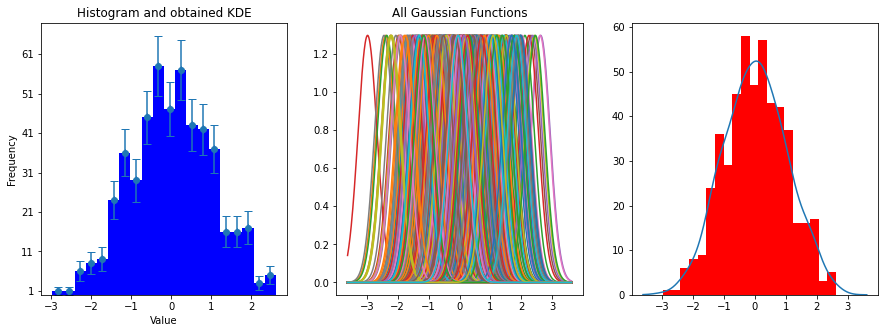

In [32]:
mu, sigma = 0,1
x = npr.normal(mu, sigma,500)
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
n, bins, _ = ax1.hist(x, bins=20, color= 'blue')
step=bins[1]-bins[0]
ax1.set_xlabel('Value')
ax1.set_ylabel('Frequency')
ax1.set_title('Histogram and obtained KDE')
ax1.set_yticks(np.arange(min(n), 2*max(n), 10.0))
mean_bins = 1/2 * ( bins[1:]+bins[:-1])
err = np.sqrt(np.abs(n))
ax1.errorbar(mean_bins, n, xerr = 0, yerr = err, fmt='o',capthick=1, capsize=4)
k = np.arange(-(max(x)+1),(max(x)+1),0.01)
std = 1.06*x.std()*np.power(len(x),-1/5)
ax2.set_title('All Gaussian Functions')
[ax2.plot(k,norm.pdf(k,x[i],scale = std)) for i in range(len(x))]
y=np.sum([norm.pdf(k,x[i],scale=std) for i in range(len(x))],axis=0)
ax3.plot(k,(y)*step*500/np.trapz(y,k))
ax3.hist(x, bins=20,color = 'red')
plt.show()

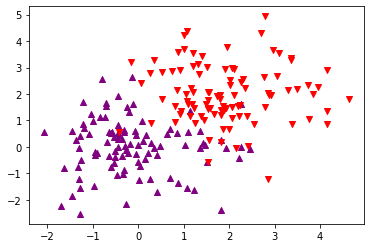

In [33]:
def dataset2D(mean,std):
    x = npr.normal(mean,sigma,100)
    y = npr.normal(mean,sigma,100)
    return (x,y)
first_cat_x, first_cat_y = dataset2D(0,1)
second_cat_x, second_cat_y = dataset2D(2,1)
plt.scatter(first_cat_x,first_cat_y,marker='^', c = 'purple')
plt.scatter(second_cat_x,second_cat_y,marker='v', c = 'red')
plt.show()

In [40]:
filename="residuals_261.npy"
data=np.load(filename,allow_pickle=True)
dt= pd.DataFrame(data.item())

In [41]:
dt = dt[np.abs(dt['residuals'])<2]
dt

,residuals,distances
0,1.100000,16.0
1,-1.950000,6.3
8,-0.042857,3.3
9,0.128571,5.3
10,0.085714,15.0
...,...,...
11126,-0.760000,14.4
11127,0.380000,7.5
11128,0.083333,1.7
11129,0.166667,19.1


In [54]:
import pandas as pd
import seaborn as sns
from scipy import stats
from scipy.stats import linregress

In [55]:
params = linregress(dt['distances'],dt['residuals'])
print(params)

LinregressResult(slope=0.003259770122030582, intercept=-0.15432816763069473, rvalue=0.04340351052255907, pvalue=8.717037183576494e-06, stderr=0.0007327014008445791)


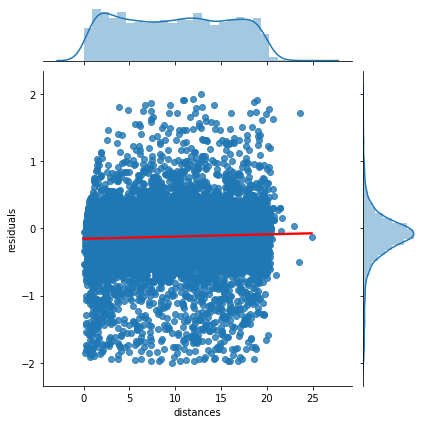

In [56]:
slope, intercept, r_value, p_value, std_err = stats.linregress(dt['residuals'], dt['distances'])
plot = sns.jointplot(x="distances", y="residuals", data=dt, kind= "reg",joint_kws={'line_kws':{'color':'r'}})

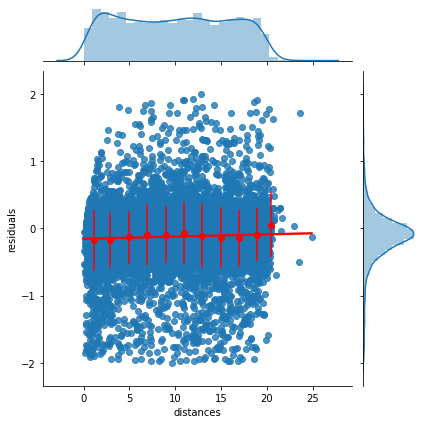

In [57]:
x=np.arange(0,21,2)
dt['bins']=np.digitize(dt['distances'], x)
mean=dt.groupby(['bins']).mean()
std=dt.groupby(['bins']).std()
x=mean['distances']
y=mean['residuals']
erry=std['residuals']
plot = sns.jointplot(x="distances", y="residuals", data=dt, kind= "reg",joint_kws={'line_kws':{'color':'r'}})
plt.errorbar(x,y,yerr=erry,fmt='o', color='r')
plt.show()